<h1>Coronary heart disease
<h2>1. Exploratory Analysis
<h3>1.1 Info and Distributions

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import math
from scipy import stats

In [3]:
# Loading Data
df = pd.read_csv('train_val_split.csv')
display(df.head())
display(df.info())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
2,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
3,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
4,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    object 
 11  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.9+ KB


None

In [4]:
# FastingBS and Heart Disease wronly as int
df['FastingBS'] = df['FastingBS'].astype('object')
df['HeartDisease'] = df['HeartDisease'].astype('object')

In [5]:
# Data Exploration
display(df.describe(include="int64").round(2))
display(df.describe(include="object"))

,Age,RestingBP,Cholesterol,MaxHR
count,734.00,734.00,734.00,734.00
mean,53.52,132.06,197.59,136.17
std,9.42,18.62,108.98,25.33
min,29.00,0.00,0.00,60.00
25%,47.00,120.00,172.25,120.00
50%,54.00,130.00,222.00,138.00
75%,60.00,140.00,267.00,155.00
max,77.00,200.00,529.00,195.00


,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
count,734,734,734,734,734,734,734
unique,2,4,2,3,2,3,2
top,M,ASY,0,Normal,N,Flat,1
freq,573,381,563,440,439,364,398


In [6]:
# Missing Values
display(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

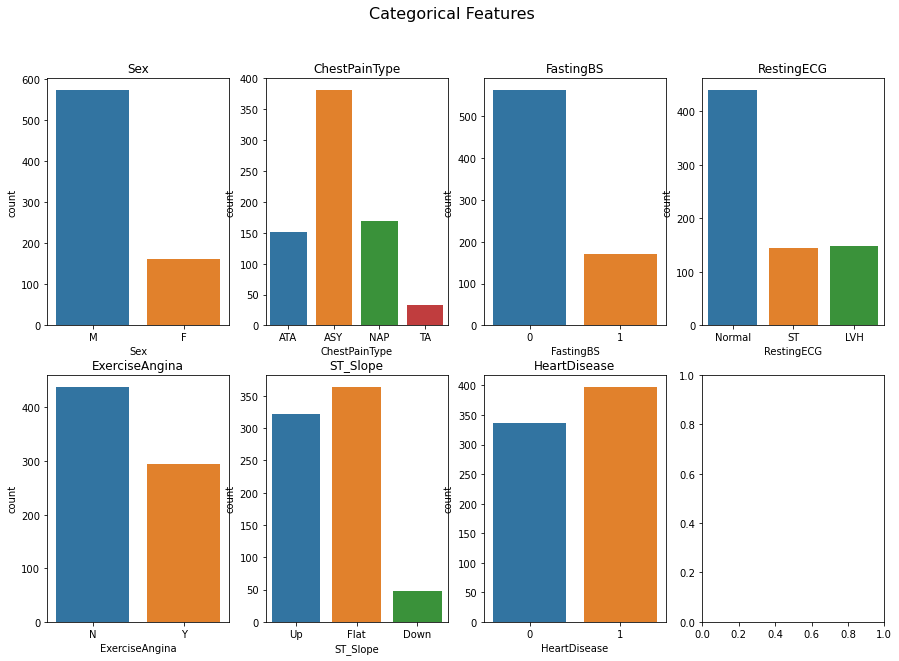

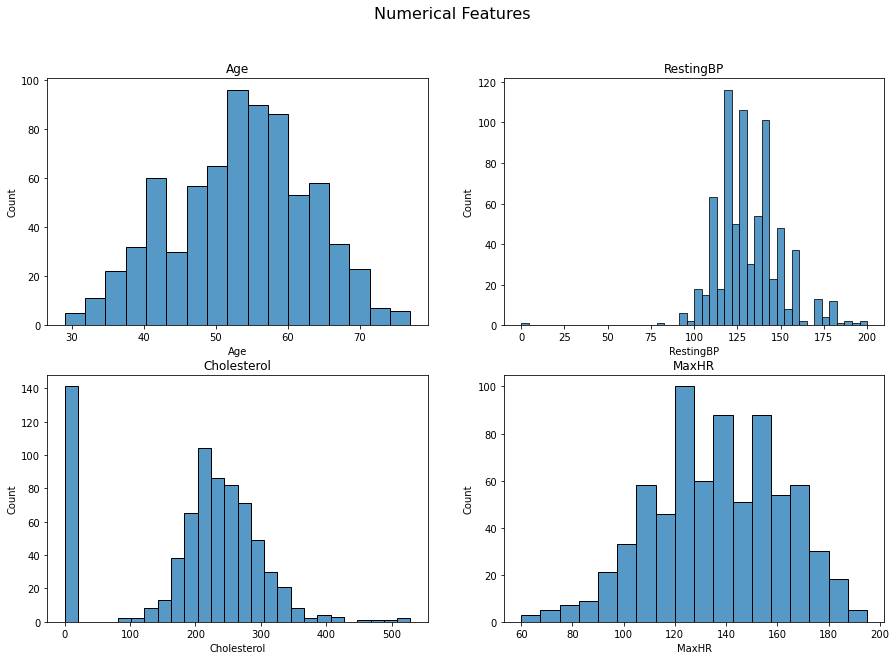

In [16]:
#Separating Categorical and Numerical Columns
categorical = df.select_dtypes(include="object").columns.tolist()
numerical = df.select_dtypes(include="int64").columns.tolist()

# Data Visualization
# Categorical Columns
fig, axs = plt.subplots(2, math.ceil(len(categorical)/2), figsize=(15, 10))
fig.suptitle('Categorical Features', fontsize=16)
for i, col in enumerate(categorical):
    ax = axs.reshape(-1)[i]
    ax.set_title(col)
    sns.countplot(x=col, data=df, ax=ax)

# Numerical Columns
fig, axs = plt.subplots(2, math.ceil(len(numerical)/2), figsize=(15, 10))
fig.suptitle('Numerical Features', fontsize=16)
for i, col in enumerate(numerical):
    ax = axs.reshape(-1)[i]
    ax.set_title(col)
    sns.histplot(x=col, data=df, ax=ax)

In [30]:
print("Number of 0 in RestingBP: ", df[df["RestingBP"] == 0].shape[0])
print("Number of 0 in Cholesterol: ", df[df["Cholesterol"] == 0].shape[0])

Number of 0 in RestingBP:  1
Number of 0 in Cholesterol:  141


Categorical

- The label heart disease seems to be balanced
- Gender is very imbalanced, could have an effect
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false), blood sugar levels lower for most participants
- restecg: resting electrocardiographic results normal for most

Numerical:
- Overall most are approximatly normally distributed
- Cholesterol has 141 entries with 0, maybe this is how they treated missing values
- RestingBP seems to have a weird outlier at 0, maybe also missing value

Conclusion: I will remove the observations with 0 values in Cholesterol and RestingBP for the rest of the exploratory analysis, and then try different imputation methods for the models.

In [39]:
# Imputation and replacement
df_preprocessed = df.copy()
df_preprocessed = df_preprocessed[df_preprocessed["RestingBP"] != 0]
df_preprocessed = df_preprocessed[df_preprocessed["Cholesterol"] != 0]

<h3>1.2 Statistical Relationships

<AxesSubplot:>

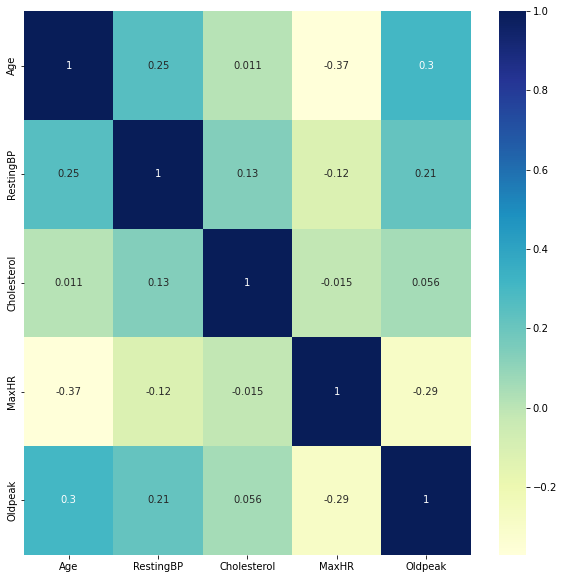

In [41]:
# Correlation between features
plt.figure(figsize=(10, 10))
sns.heatmap(df_preprocessed.corr(), annot=True, cmap="YlGnBu")

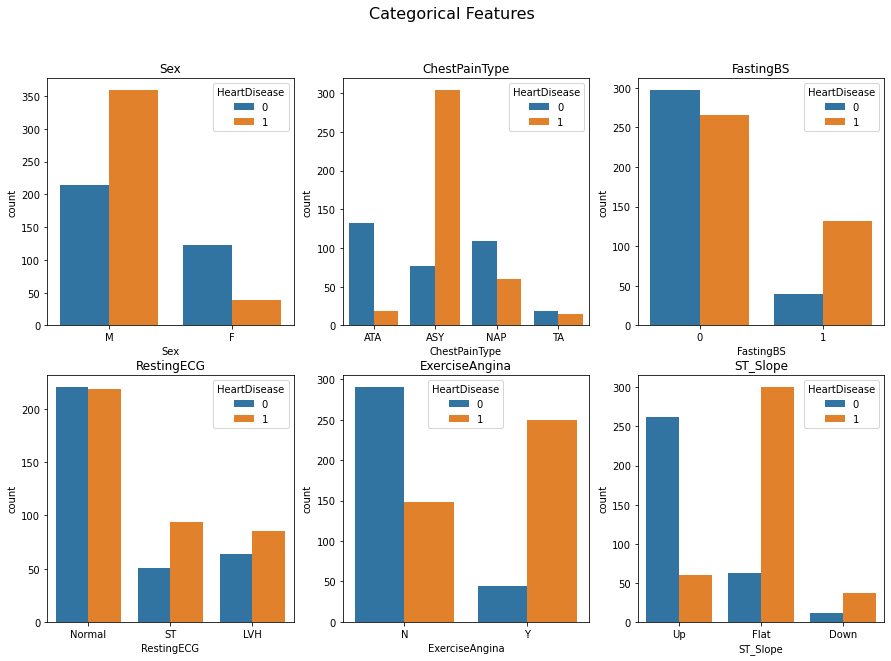

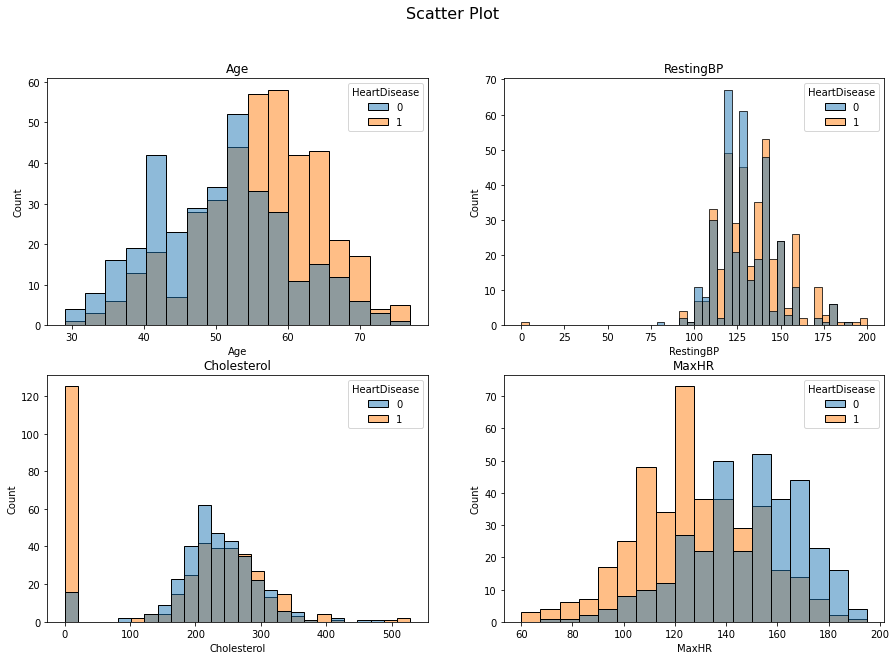

In [24]:
#Separating Categorical and Numerical Columns
categorical = df.select_dtypes(include="object").columns.tolist()[:-1]
numerical = df.select_dtypes(include="int64").columns.tolist()

# Categorical Columns
fig, axs = plt.subplots(2, math.ceil(len(categorical)/2), figsize=(15, 10))
fig.suptitle('Categorical Features', fontsize=16)
for i, col in enumerate(categorical):
    ax = axs.reshape(-1)[i]
    ax.set_title(col)
    sns.countplot(x=col, data=df, ax=ax, hue="HeartDisease")

# Histogram
fig, axs = plt.subplots(2, math.ceil(len(numerical)/2), figsize=(15, 10))
fig.suptitle('Scatter Plot', fontsize=16)
for i, col in enumerate(numerical):
    ax = axs.reshape(-1)[i]
    ax.set_title(col)
    sns.histplot(x=col, data=df, ax=ax, hue= "HeartDisease", multiple="layer")



In [55]:
# Correlations of feature and target
y = df_preprocessed["HeartDisease"]
X = df_preprocessed.drop("HeartDisease", axis=1)

# Print Biserial Correlation for Numerical Features with Heart Disease
for col in numerical:
    print(col, ":", stats.pointbiserialr(X[col], y)[0])


Age : 0.3147631078582542
RestingBP : 0.16122528701544672
Cholesterol : 0.10634855859114178
MaxHR : -0.39682235510094693


From the Plots and Correlation Coefficients it seems as though Sex and Age alone could be good predictors, with older people and males suffering more frequently from a Heart Disease. A certain type of chest pain (ASY) seems to be very common in people with a heart disease. Also ST_Slope and MaxHR seem to be promising indicators.